In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib import gridspec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
plt.style.use("../paper.mplstyle")

import h5py

from scipy.interpolate import splrep, splev

In [3]:


mc = h5py.File('/data/ana/SterileNeutrino/IC86/HighEnergy/SPE_Templates/Nominal/Ares/IC86.AVG/Merged/Ares_IC86.AVG_0.97_lite_platinum_98000.h5')
mc_e   = mc['NuEnergy']['value']
mc_pid = mc['PrimaryType']['value']

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """


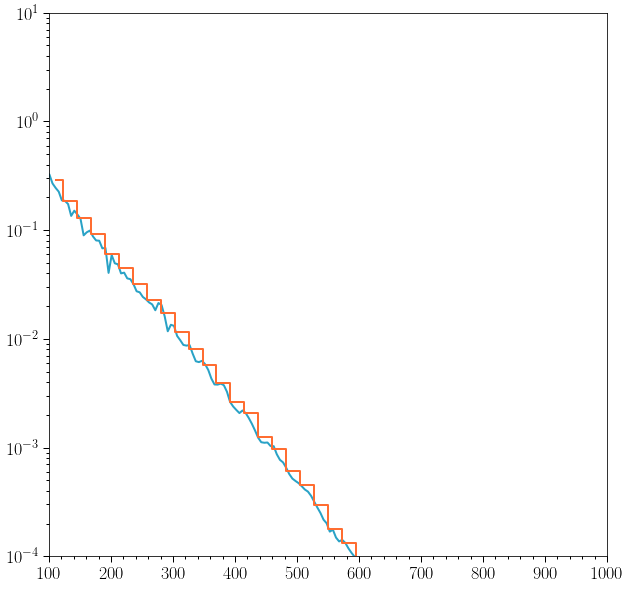

In [34]:
ch = 5
m  = 1000

e_edges = np.linspace(1e2, m, 41)
e_widths = e_edges[:-1]-e_edges[1:]
e_cents  = (e_edges[:-1]+e_edges[1:])/2.

f = np.load('../data/mc_dn_dz/ch%d-m%d_Nominal_dn_dz.npy' % (ch, m))
h_flux = np.histogram(mc_e, bins=e_edges, weights=f)
h = np.histogram(mc_e, bins=e_edges)

_ = np.load('../data/1AU/ch%d-m%d_dn_dz.npy' % (ch, m))[0,0,:]+np.load('../data/1AU/ch%d-m%d_dn_dz.npy' % (ch,m))[1,0,:]
eeee = np.linspace(10./m, m, 200)

plt.plot(eeee, _/2)
plt.step(e_cents, h_flux[0]/[float(_) for _ in h[0]], where='mid')
plt.semilogy()
plt.xlim(100, m)
plt.ylim(1e-4, 10)
plt.show()

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


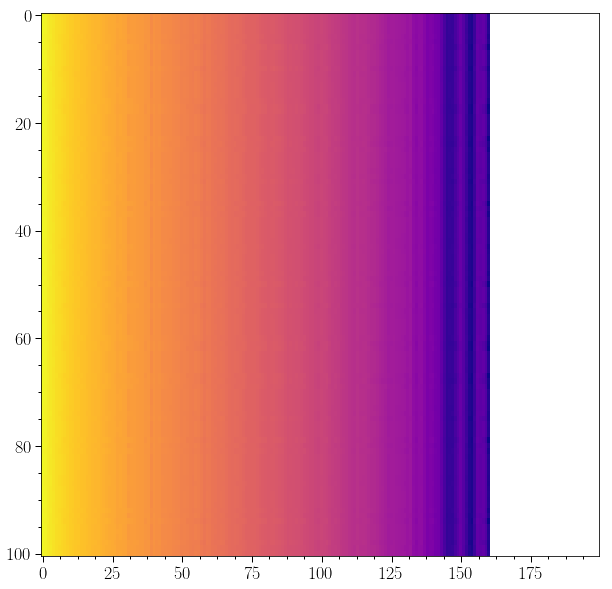

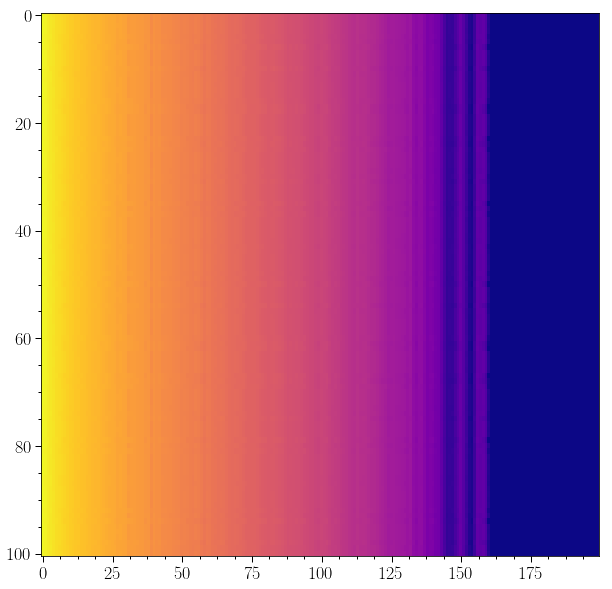

In [4]:
lflux = np.log([_ for _ in np.load('../data/qr_dn_dz/ch5-m1000_dn_dz.npy')[0]])
plt.imshow(lflux, aspect='auto')
plt.show()
lflux_isfin = np.where(np.isfinite(lflux))
lflux_isinf = np.where(~np.isfinite(lflux))
lflux[lflux_isinf] = np.min(lflux[lflux_isfin])

plt.imshow(lflux, aspect='auto')
plt.show()

In [5]:
xnew_edges, ynew_edges = np.mgrid[np.radians(80):np.radians(180):101j, np.log(10./1000):np.log(1000):200j]

In [7]:
# x = xnew_edges
# y = ynew_edges
# z = lflux

# print(len(x)==len(y)==len(z))

tck = bisplrep(xnew_edges, ynew_edges, lflux, s=0)

/home/jlazar/.local/lib/python2.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=106,178 m=20200 fp=1.086347 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [6]:
bisplev(np.radians(95), 2.7, tck)

NameError: name 'tck' is not defined

In [6]:
ch = 5
m  = 1000
ee = np.linspace(10., m, 200)

flux = np.load('../data/1AU/ch%d-m%d_dn_dz.npy' % (ch, m))
nuflux    = flux[0][0]
nubarflux = flux[1][0]

nu_tck    = splrep(ee, np.log(nuflux), s=0.7)
nubar_tck = splrep(ee, np.log(nubarflux), s=0.7)

def get_flux(e, pid):
    if e > m:
        flux = 0
    else:
        if pid==14:
            flux = np.exp(splev(e, nu_tck))
        elif pid==-14:
            flux = np.exp(splev(e, nubar_tck))
        else:
            print('wrong pid bucko')
            flux = 0
    return flux

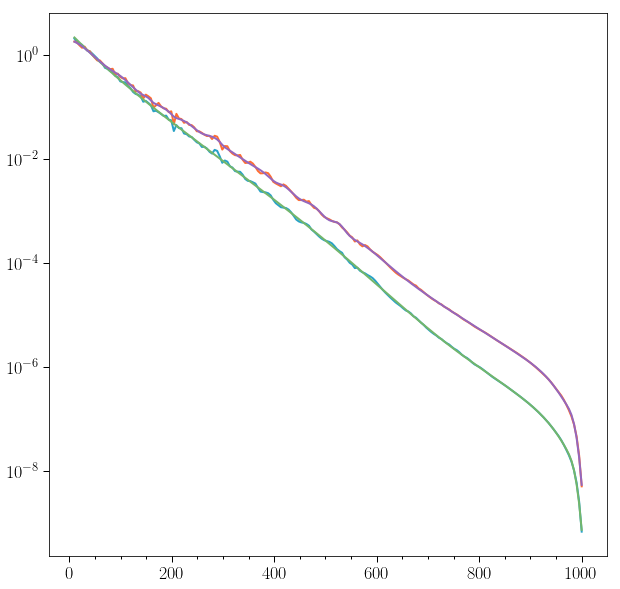

In [7]:
plt.plot(ee, nuflux)
plt.plot(ee, nubarflux)
plt.plot(ee, [get_flux(e, 14) for e in ee])
plt.plot(ee, [get_flux(e, -14) for e in ee])
plt.semilogy()
plt.show()

In [8]:
mc_flux = [get_flux(*tup) for tup in zip(mc_e, mc_pid)]

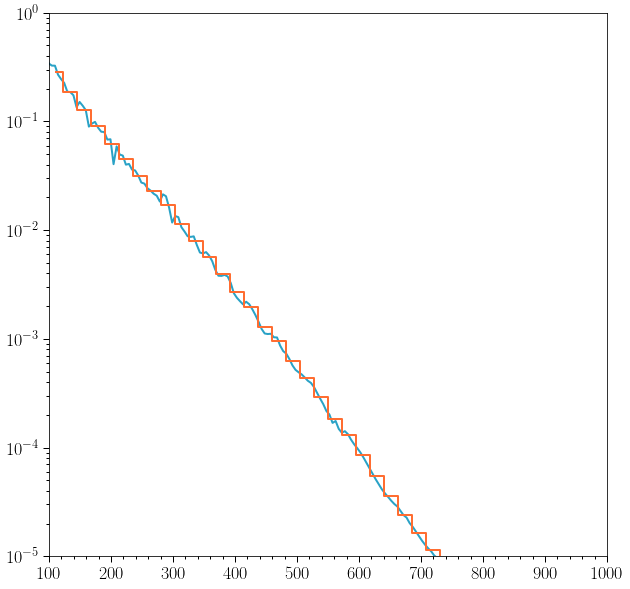

In [24]:
e_edges = np.linspace(1e2,1e3,41)
e_widths = e_edges[:-1]-e_edges[1:]
e_cents  = (e_edges[:-1]+e_edges[1:])/2.

h_flux = np.histogram(mc_e, bins=e_edges, weights=mc_flux)
h = np.histogram(mc_e, bins=e_edges)

plt.plot(ee, (nuflux+nubarflux)/2.)
plt.step(e_cents, h_flux[0]/[float(_) for _ in h[0]], where='mid')
plt.semilogy()
plt.xlim(100, 1000)
plt.ylim(1e-5, 1)
plt.show()

In [20]:
print(h[0])
print(h_flux[0])

[ 55682 137360 226798 304551 364586 410530 442026 459685 468324 469175
 462891 455142 443208 432409 417495 403054 389784 374449 361885 347219
 334984 321850 310078 298345 288427 277422 266975 258060 248821 240065
 231663 225240 217343 210606 202997 196703 191580 185765 179696 173620]
[1.57377011e+04 2.54211518e+04 2.90913659e+04 2.73952898e+04
 2.25620803e+04 1.85538562e+04 1.39349984e+04 1.06382649e+04
 8.06917780e+03 5.32706471e+03 3.69906396e+03 2.58409743e+03
 1.76581520e+03 1.16204990e+03 8.17107217e+02 5.19224213e+02
 3.70936928e+02 2.32439982e+02 1.57720145e+02 1.01653162e+02
 6.16780903e+01 4.17166116e+01 2.65236060e+01 1.64607461e+01
 1.04247954e+01 6.72862858e+00 4.41757108e+00 2.97690206e+00
 2.02767110e+00 1.39476194e+00 9.66321247e-01 6.78457796e-01
 4.69316917e-01 3.26369702e-01 2.22557812e-01 1.50218250e-01
 9.54200819e-02 5.28102391e-02 2.44964644e-02 6.29622224e-03]


In [12]:
for e, pid, flux in zip(mc_e[:100], mc_pid[:100], mc_flux[:100]):
    if e<m:
        print(e, pid, flux)

(427.2523655203643, 14.0, 0.001012386322768411)
(951.235896638238, 14.0, 5.213629642382402e-08)
(898.4529317968006, 14.0, 1.919414234035027e-07)
(445.4761109083418, 14.0, 0.0007312442246029641)
(253.56737974816045, 14.0, 0.020163970319542323)
(334.0832455453435, 14.0, 0.005102600812264047)
(573.2141490293402, 14.0, 6.529160802022372e-05)
(947.277938511974, 14.0, 5.9125025527069414e-08)
(767.0686376877425, 14.0, 1.68173340179341e-06)
(996.5179194039977, 14.0, 1.722092516546159e-09)
(245.17213361359217, 14.0, 0.02328517108481074)
(630.8999392370876, 14.0, 2.088740578606554e-05)
(557.5521446273623, 14.0, 8.882690040114937e-05)
(728.2407727487566, 14.0, 3.2829185591111456e-06)
(559.442268579822, 14.0, 8.55958844313817e-05)
(222.73215208955094, 14.0, 0.034281847057383776)
(121.0829368644139, 14.0, 0.2148117356040003)
(124.39731664883502, 14.0, 0.20168992714752473)
(258.79532651533, 14.0, 0.018438185317888794)
(478.23558133405544, 14.0, 0.0004030191785241177)
(199.005432545758, 14.0, 0.05185

In [42]:
np.load('../data/mc_oneweight/Nominal.npy')[:100]/mc['oneweight']['value'][:100]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
mc['oneweight']['value'][:100]

array([1.30562448e+05, 3.74921455e+03, 5.74797627e+05, 5.60352092e+04,
       1.25206161e+05, 4.61892461e+04, 4.91806951e+03, 6.58389590e+02,
       7.15905581e+04, 1.79766341e+03, 1.10932630e+06, 1.12538910e+04,
       6.06128999e+04, 2.70412642e+04, 3.08051796e+07, 2.41359109e+08,
       7.24336933e+04, 5.89081767e+02, 2.91026670e+08, 1.57611122e+04,
       9.19117579e+03, 2.26798353e+04, 9.29686509e+03, 5.04490139e+02,
       6.19977600e+01, 2.28239230e+07, 6.44979689e+01, 9.60958643e+04,
       8.00792691e+02, 1.49121649e+07, 5.66373384e+03, 4.70174600e+06,
       1.45143842e+08, 1.50940010e+07, 2.42206778e+08, 7.75600102e+05,
       4.43758523e+05, 1.18106340e+05, 2.96631234e+02, 7.60895016e+04,
       1.21996180e+05, 1.98849266e+03, 2.44518954e+06, 5.31985667e+06,
       1.88975554e+08, 2.33030996e+02, 7.36641597e+04, 3.15438684e+02,
       2.64768848e+05, 7.36878152e+04, 8.13842521e+04, 2.08266310e+04,
       1.05421477e+03, 3.90258547e+05, 1.41045565e+07, 1.62074788e+04,
      

In [39]:
conv_flux = h5py.File('../data/fluxes/atmospheric_0_0.000000_0.000000_0.000000_0.000000_0.000000_0.000000.hdf5', 'r')

In [40]:
conv_flux.keys()

[u'costh_-0.006061',
 u'costh_-0.018182',
 u'costh_-0.030303',
 u'costh_-0.042424',
 u'costh_-0.054545',
 u'costh_-0.066667',
 u'costh_-0.078788',
 u'costh_-0.090909',
 u'costh_-0.103030',
 u'costh_-0.115152',
 u'costh_-0.127273',
 u'costh_-0.139394',
 u'costh_-0.151515',
 u'costh_-0.163636',
 u'costh_-0.175758',
 u'costh_-0.187879',
 u'costh_-0.200000',
 u'costh_-0.212121',
 u'costh_-0.224242',
 u'costh_-0.236364',
 u'costh_-0.248485',
 u'costh_-0.260606',
 u'costh_-0.272727',
 u'costh_-0.284848',
 u'costh_-0.296970',
 u'costh_-0.309091',
 u'costh_-0.321212',
 u'costh_-0.333333',
 u'costh_-0.345455',
 u'costh_-0.357576',
 u'costh_-0.369697',
 u'costh_-0.381818',
 u'costh_-0.393939',
 u'costh_-0.406061',
 u'costh_-0.418182',
 u'costh_-0.430303',
 u'costh_-0.442424',
 u'costh_-0.454545',
 u'costh_-0.466667',
 u'costh_-0.478788',
 u'costh_-0.490909',
 u'costh_-0.503030',
 u'costh_-0.515152',
 u'costh_-0.527273',
 u'costh_-0.539394',
 u'costh_-0.551515',
 u'costh_-0.563636',
 u'costh_-0.5